In [5]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

In [6]:
def Muller(f, p, q, r, TOL, N = MaxIterations): 

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(p)
    x1 = copy.copy(q)
    x2 = copy.copy(r)
    
    print("\n\n*** MULLER METHOD IMPLEMENTATION ***")
    
    data = []           # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph
    
    h1 = x1 - x0  
    h2 = x2 - x1 
    
    f0 = f(x0) 
    f1 = f(x1) 
    f2 = f(x2) 
    
    d1 = (f1 - f0)/h1  
    d2 = (f2 - f1)/h2 
    d = (d2-d1)/(h1+h2) 
    i = 3
    
    while i<=N: 
        
        b = d2 +h2*d
        D = ((b**2)-4*f2*d)**(1/2)
            
        if(abs(b-D) < abs(b+D)):
            E = b + D 
        else:
            E = b - D

        h = -2*f2/E
        p = x2 + h
        
       
        
        print(f'Iteration = {i:3}  a = {d:.6f} b = {b:.6f}  c = {f(x2):.6f}  p = {p:.6f}  f(p) = {f(p):.6f}')
        
        # Adding data in data list which was created for plotting table
        data.append([i,d,b,f(x2),p,f(p)])

        if(abs(h)<TOL or abs(f(p)) < TOL):
            print("\nFinal Root found")
            print(f'Iteration = {i:3}  a = {d:.6f} b = {b:.6f}  c = {f(x2):.6f}  p = {p:.6f}  f(p) = {f(p):.6f}')
            print(f"Required Root is: {p:3.6f}")
            break
        
        x0 = x1
        x1 = x2
        x2 = p

        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([i,abs(x1-x2)])

        h1 = x1 - x0  
        h2 = x2 - x1 

        f0 = f(x0) 
        f1 = f(x1) 
        f2 = f(x2) 
        
        d1 = (f1 - f0)/h1  
        d2 = (f2 - f1)/h2 
        d = (d2-d1)/(h1+h2) 
    
        i += 1          # Incrementing step count for next iteration

    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','a','b','c','p (root)','f(p)'])
    for dt in data:
        table.add_row(dt)

    if (i > MaxIterations): 
        print("Root cannot be found using, Muller's method") 

    return accuracy,table

In [7]:
# Defining Function
def f(x):
    q = cos(x) - x*exp(x)
    return q

# Initial Guesses and accuracy
x0 = 0.0
x1 = 1.0
x2 = 1.5

e = 0.001



*** MULLER METHOD IMPLEMENTATION ***
Iteration =   3  a = -3.846436 b = -10.870852  c = -6.651796  p = 0.604127  f(p) = -0.282346
Iteration =   4  a = -4.642559 b = -2.950630  c = -0.282346  p = 0.486765  f(p) = 0.091862
Iteration =   5  a = -3.870059 b = -2.734294  c = 0.091862  p = 0.518900  f(p) = -0.003479
Iteration =   6  a = -2.599806 b = -3.050462  c = -0.003479  p = 0.517758  f(p) = -0.000003

Final Root found
Iteration =   6  a = -2.599806 b = -3.050462  c = -0.003479  p = 0.517758  f(p) = -0.000003
Required Root is: 0.517758


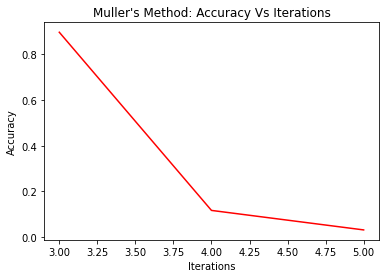

+-----------+---------------------+---------------------+------------------------+--------------------+-------------------------+
| Iteration |          a          |          b          |           c            |      p (root)      |           f(p)          |
+-----------+---------------------+---------------------+------------------------+--------------------+-------------------------+
|     3     | -3.8464361599373813 | -10.870851842465669 |   -6.651796403839394   | 0.6041272719107791 |   -0.2823461560568532   |
|     4     |  -4.642558808957501 |  -2.950629515984926 |  -0.2823461560568532   | 0.4867651469241623 |   0.09186211523729948   |
|     5     | -3.8700590424119743 |  -2.734294283206072 |  0.09186211523729948   | 0.5188998519699319 |  -0.0034789168430902073 |
|     6     |  -2.599805576774044 |  -3.050461899976916 | -0.0034789168430902073 | 0.5177582855593464 | -2.8044656993353456e-06 |
+-----------+---------------------+---------------------+------------------------+--------

In [8]:
m_acc,Muller_table = Muller(f,x0,x1,x2,e)
m_i = []
m_a = []
for i in m_acc:
    m_i.append(i[0])
    m_a.append(i[1])
plt.title("Muller's Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(m_i,m_a,color = 'red')
plt.show()
print(Muller_table)